In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r'/content/twitter_parsed_dataset.csv')

In [3]:
df.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [4]:
df.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.describe()

,oh_label
count,16848.000000
mean,0.317367
std,0.465465
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.shape

(16848, 5)

In [8]:
!pip install keras

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

from textblob import TextBlob

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

In [13]:
pip install contractions

In [14]:
import contractions

In [15]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):

    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('#', ' ', sample) #remove hashtags
    sample = ' '.join([x for x in sample.split() if not x.startswith('@')]) # remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english

    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])

    return sample

In [16]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))
df


,index,id,Text,Annotation,oh_label,cleaned_text
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,i read them in context no change in meaning th...
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,now you idiots claim that people who tried to ...
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,rt call me sexist but when i go to an auto pla...
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,wrong isis follows the example of mohammed and...
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0,mkr no no no no no no
...,...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0,feeling so sorry for the girls they should be ...
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,mkr pretty good dishes we are happy with ok we...
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,rt deconstructed lemon tart can we please go j...
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,you are too stupid to talk to blocked


In [17]:
cleaned_text=df['cleaned_text']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(cleaned_text).toarray()
y=df['oh_label']

In [19]:
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
16846    0.0
16847    0.0
16848    0.0
16849    0.0
16850    0.0
Name: oh_label, Length: 16848, dtype: float64


In [20]:
len(X[0])

1500

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GN_model=classifier.fit(X_train, y_train)

In [23]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 864 1420]
 [ 141  945]]


0.5367952522255193

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
SC_model=classifier.fit(X_train, y_train)

In [25]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2157  127]
 [ 488  598]]


0.8175074183976261

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model=KNN.fit(X_train, y_train)

In [28]:
y_pred = KNN.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [29]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2152  132]
 [ 768  318]]


0.7329376854599406

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model=classifier.fit(X_train, y_train)

In [31]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1934  350]
 [ 449  637]]


0.7629080118694362

[Text(0.959894905437119, 0.9984615384615385, 'x[1152] <= 0.5\nentropy = 0.9\nsamples = 13478\nvalue = [9217, 4261]'),
 Text(0.9338190955149646, 0.9953846153846154, 'x[671] <= 0.5\nentropy = 0.85\nsamples = 12626\nvalue = [9143, 3483]'),
 Text(0.9144793061336702, 0.9923076923076923, 'x[903] <= 0.5\nentropy = 0.814\nsamples = 11964\nvalue = [8950, 3014]'),
 Text(0.9067052696013861, 0.9892307692307692, 'x[869] <= 0.5\nentropy = 0.798\nsamples = 11791\nvalue = [8943, 2848]'),
 Text(0.8963403070257541, 0.9861538461538462, 'x[844] <= 0.5\nentropy = 0.773\nsamples = 11491\nvalue = [8882, 2609]'),
 Text(0.8825876459942122, 0.9830769230769231, 'x[868] <= 0.5\nentropy = 0.76\nsamples = 11358\nvalue = [8861, 2497]'),
 Text(0.8703326297928066, 0.98, 'x[449] <= 0.5\nentropy = 0.743\nsamples = 11152\nvalue = [8802, 2350]'),
 Text(0.8590793992174672, 0.9769230769230769, 'x[529] <= 0.5\nentropy = 0.736\nsamples = 11087\nvalue = [8791, 2296]'),
 Text(0.8477365606583437, 0.9738461538461538, 'x[134] <= 0

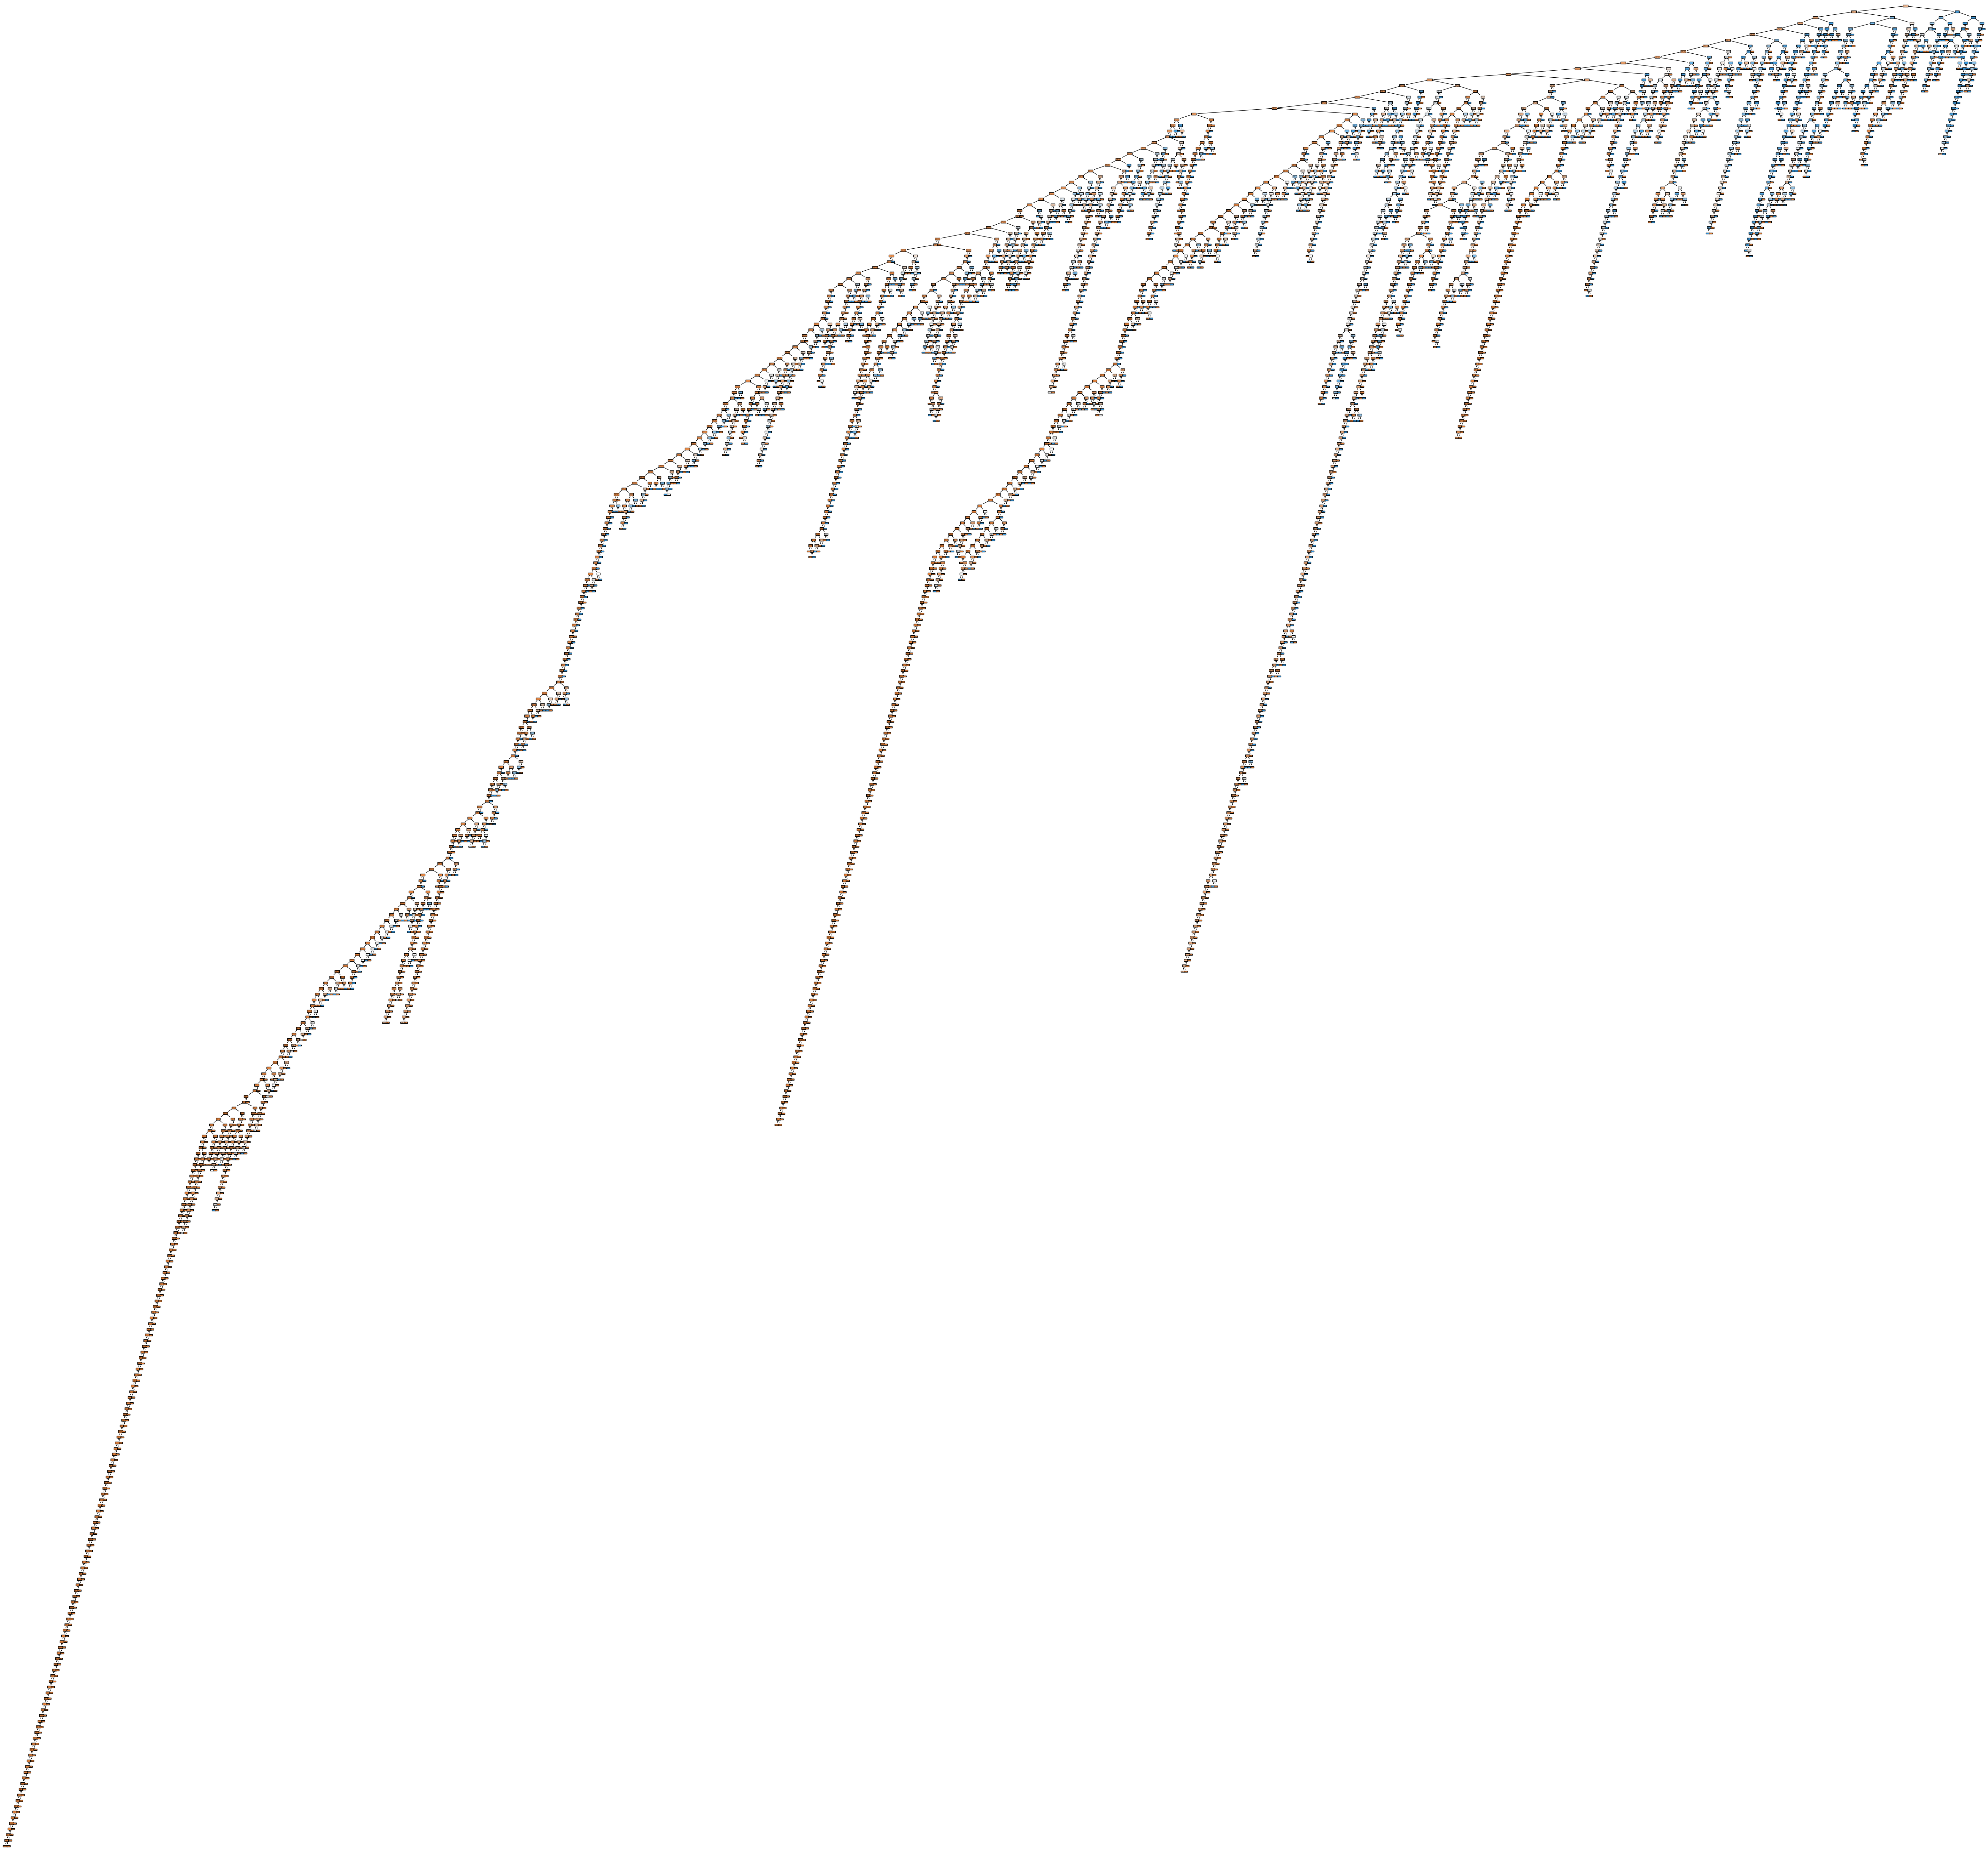

In [38]:
from sklearn import tree
import sys
sys.setrecursionlimit(10000)
plt.figure(figsize=(80,75))
tree.plot_tree(classifier, filled=True)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model=classifier.fit(X_train, y_train)

In [40]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2117  167]
 [ 484  602]]


0.8068249258160237

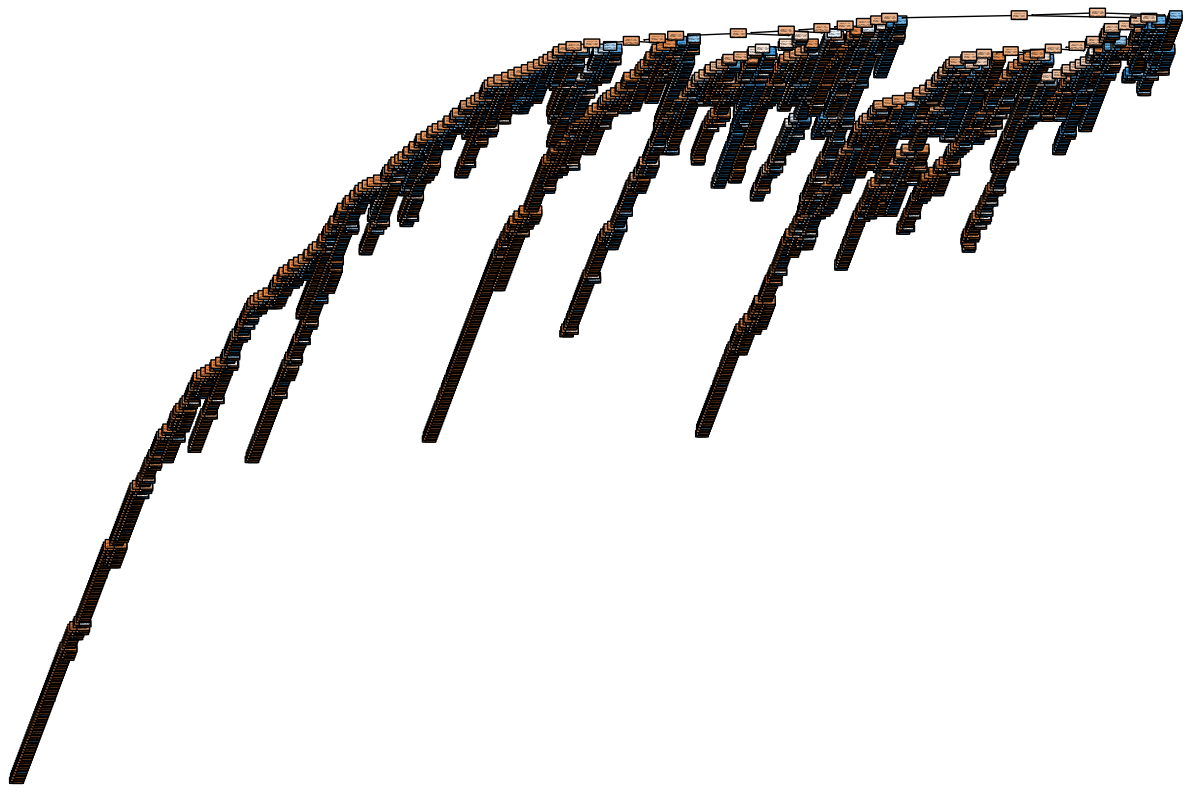

In [47]:
from sklearn.tree import plot_tree
feature_names=None
plt.figure(figsize=(15,10))
plot_tree(classifier.estimators_[0],
          feature_names=feature_names,
          class_names='class',
          filled=True, impurity=True,
          rounded=True)
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
log_model=classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2078  206]
 [ 405  681]]


0.8186943620178041

<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83      2284
         1.0       0.71      0.29      0.41      1086

    accuracy                           0.73      3370
   macro avg       0.72      0.62      0.62      3370
weighted avg       0.73      0.73      0.69      3370



<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      2284
         1.0       0.78      0.55      0.65      1086

    accuracy                           0.81      3370
   macro avg       0.80      0.74      0.76      3370
weighted avg       0.80      0.81      0.80      3370



<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.86      0.38      0.53      2284
         1.0       0.40      0.87      0.55      1086

    accuracy                           0.54      3370
   macro avg       0.63      0.62      0.54      3370
weighted avg       0.71      0.54      0.53      3370



<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      2284
         1.0       0.65      0.59      0.61      1086

    accuracy                           0.76      3370
   macro avg       0.73      0.72      0.72      3370
weighted avg       0.76      0.76      0.76      3370



<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2284
         1.0       0.82      0.55      0.66      1086

    accuracy                           0.82      3370
   macro avg       0.82      0.75      0.77      3370
weighted avg       0.82      0.82      0.81      3370



<ipython-input-51-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-51-ff13a287dbe0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      2284
         1.0       0.77      0.63      0.69      1086

    accuracy                           0.82      3370
   macro avg       0.80      0.77      0.78      3370
weighted avg       0.81      0.82      0.81      3370

                   Models   Accuracy
0    KNeighborsClassifier  72.581602
0  RandomForestClassifier  78.753709
0              GaussianNB  51.988131
0  DecisionTreeClassifier  73.738872
0                     SVC  78.724036
0      LogisticRegression  79.109792


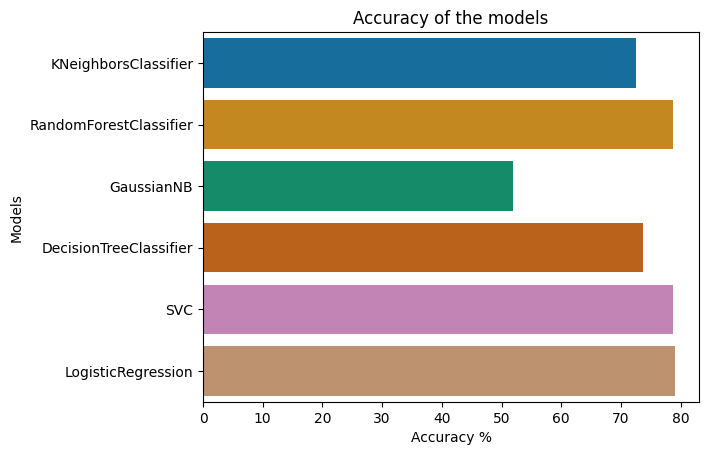

In [51]:
import seaborn as sea
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
models = [KNN_model,rf_model,GN_model,DT_model,SC_model,log_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    print(classification_report(y_test, y_pred))

sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
print(results)